# Agregación de datos por categoría

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

Para generar variables categóricas aleatorias usaremos la función `choice` de la biblioteca `random.numpy`.

Lo primero que debemos hacer es crear los valores que puede tomar cada variable, de forma que la función luego elija aleatoriamente entre ellos para crear la variable.

In [3]:
gender = ["Male", "Female"]
income = ["Low", "Middle", "High"]

A continuación, creamos nuestras variables como se describió anteriormente, usando la función `append` y `random.choice`:

In [4]:
n = 500
gender_data = []
income_data = []

for i in range(0,n):
    gender_data.append(np.random.choice(gender))
    income_data.append(np.random.choice(income))

Por último, podemos agregar las variables a un data frame.

In [5]:
data = pd.DataFrame(
    {
        'Gender' : gender_data,
        'Income level': income_data
    }
)
data.head()

,Gender,Income level
0,Male,Low
1,Female,High
2,Female,Low
3,Male,Middle
4,Female,Middle


Ahora también podemos agregar variables numéricas al data frame. El proceso será como el que se explicó en la anterior lección.

In [6]:
# Z -> N(0,1)
# N(m, sd) -> m + sd * Z
height = 160 + 5 * np.random.randn(n)
weight = 65 + 20 * np.random.randn(n)
age = 30 + 12 * np.random.randn(n)
age = age.astype(int)
income = 18000 + 3500 * np.random.rand(n)
income = income.astype(int)

In [7]:
data = pd.DataFrame(
    {
        'Gender' : gender_data,
        'Economic Status': income_data,
        'Height': height,
        'Weight': weight,
        'Age' : age,
        'Income' : income
    }
)

In [8]:
data.head()

,Gender,Economic Status,Height,Weight,Age,Income
0,Male,Low,157.537932,61.405516,33,18059
1,Female,High,160.533711,63.612665,36,18022
2,Female,Low,158.122405,66.587184,29,18898
3,Male,Middle,165.892802,36.906338,33,20672
4,Female,Middle,160.961691,73.011935,30,18356


In [9]:
data.describe()

,Height,Weight,Age,Income
count,500.000000,500.000000,500.000000,500.000000
mean,159.918156,63.943992,29.654000,19747.230000
std,5.104370,20.223446,12.115108,1023.624433
min,145.455846,6.985607,-13.000000,18001.000000
25%,156.670310,50.685906,22.000000,18834.500000
50%,159.776143,63.958096,30.000000,19764.500000
75%,163.589879,77.792109,37.000000,20673.250000
max,175.085206,122.511995,63.000000,21491.000000


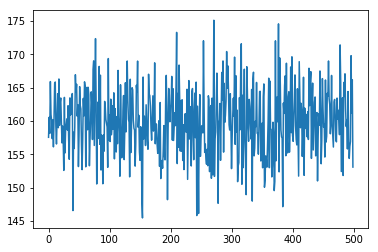

In [10]:
plt.plot(data['Height'])

(array([  9.,  12.,  53.,  79., 123.,  85.,  86.,  39.,  10.,   4.]),
 array([145.45584582, 148.4187818 , 151.38171778, 154.34465375,
        157.30758973, 160.27052571, 163.23346169, 166.19639767,
        169.15933364, 172.12226962, 175.0852056 ]),
 <a list of 10 Patch objects>)

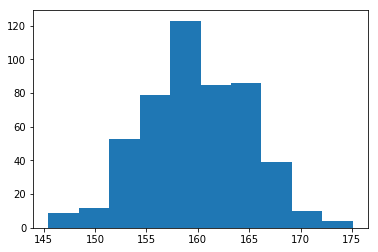

In [11]:
plt.hist(data['Height'])

## Agrupación de datos

Para agrupar datos en función de una variable categórica usaremos la función `groupby("__variable__")`. Esta creará un objeto cuyos valores serán un `nombre` y una `agrupación`. Para acceder a ellos usaremos la sintaxis típica de `.`, guardando el objeto en una variable al emplear la función.

In [14]:
grouped_gender = data.groupby("Gender")
grouped_gender.groups

{'Female': Int64Index([  1,   2,   4,   6,   7,   8,  12,  13,  14,  17,
             ...
             487, 488, 489, 490, 491, 493, 494, 495, 498, 499],
            dtype='int64', length=244),
 'Male': Int64Index([  0,   3,   5,   9,  10,  11,  15,  16,  18,  20,
             ...
             474, 475, 476, 479, 483, 484, 486, 492, 496, 497],
            dtype='int64', length=256)}

Estos grupos se pueden recorrer de una manera muy útil mediante bucles. El siguiente es un ejemplo.

In [17]:
for names, groups in grouped_gender:
    print(names)
    print(groups)

Female
     Gender Economic Status      Height      Weight  Age  Income
1    Female            High  160.533711   63.612665   36   18022
2    Female             Low  158.122405   66.587184   29   18898
4    Female          Middle  160.961691   73.011935   30   18356
6    Female             Low  157.343745   40.149613   54   20603
7    Female          Middle  160.148189   61.656025   18   19194
8    Female          Middle  156.107115   39.067677   24   21359
12   Female            High  159.175965   39.656345   27   19642
13   Female          Middle  156.534603   60.396309    9   18478
14   Female          Middle  160.114229   76.120249   34   21200
17   Female          Middle  166.282386   42.028794   17   20138
19   Female            High  162.686953   46.570968   57   21240
22   Female          Middle  156.699201   65.192780   17   21204
23   Female          Middle  159.236756   93.284263    6   18410
25   Female             Low  152.575431   61.856329   20   19019
26   Female       

También podremos acceder a los grupos de datos a través de la función `get_group`.

In [20]:
grouped_gender.get_group("Female").head()

,Gender,Economic Status,Height,Weight,Age,Income
1,Female,High,160.533711,63.612665,36,18022
2,Female,Low,158.122405,66.587184,29,18898
4,Female,Middle,160.961691,73.011935,30,18356
6,Female,Low,157.343745,40.149613,54,20603
7,Female,Middle,160.148189,61.656025,18,19194


Además, podremos agrupar datos por más de una variable. Para ello crearemos un array con los nombres de las variables por las que quiero agrupar en orden de prioridad dentro de la función `groupby()`.

In [24]:
double_group = data.groupby(["Gender", "Economic Status"])

Por los valores de las variables (2 géneros y 3 estados económicos) obtendremos 6 grupos.

In [25]:
len(double_group)

6

Y acceder a ellos mediante el loop igualmente.

In [26]:
for names, groups in double_group:
    print(names)
    print(groups)

('Female', 'High')
     Gender Economic Status      Height      Weight  Age  Income
1    Female            High  160.533711   63.612665   36   18022
12   Female            High  159.175965   39.656345   27   19642
19   Female            High  162.686953   46.570968   57   21240
31   Female            High  158.618010   68.466069   30   18297
34   Female            High  154.241854   71.393995   31   20702
47   Female            High  160.712923   71.484110   45   21308
48   Female            High  162.426095   90.363862   21   20348
57   Female            High  163.368150   53.250374   17   18788
62   Female            High  162.020634   60.967505   36   18539
63   Female            High  165.028618   43.733548   13   19256
64   Female            High  158.666023   65.623157   15   18391
65   Female            High  165.032432   66.656057   12   19356
70   Female            High  164.350854   74.381975   18   20257
76   Female            High  164.716510   44.645800   49   21358
80   F

## Operaciones sobre datos agrupados

Ahora veremos algunos ejemplos de operaciones que se pueden realizar sobre datos agrupados.

In [28]:
double_group.sum()

Height       Weight   Age   Income
Gender Economic Status                                          
Female High             11668.564486  4850.600631  2059  1441990
       Low              13546.664623  5382.377707  2543  1682432
       Middle           13743.341333  5313.095636  2533  1700750
Male   High             13598.039643  5469.608819  2630  1668342
       Low              12011.427149  4613.316150  2211  1487525
       Middle           15391.040954  6342.996978  2851  1892576

In [33]:
double_group.mean()

Height     Weight        Age        Income
Gender Economic Status                                                
Female High             159.843349  66.446584  28.205479  19753.287671
       Low              159.372525  63.322091  29.917647  19793.317647
       Middle           159.806295  61.780182  29.453488  19776.162791
Male   High             159.976937  64.348339  30.941176  19627.552941
       Low              160.152362  61.510882  29.480000  19833.666667
       Middle           160.323343  66.072885  29.697917  19714.333333

Para obtener el conteo de casos usamos `size()`.

In [35]:
double_group.size()

Gender  Economic Status
Female  High               73
        Low                85
        Middle             86
Male    High               85
        Low                75
        Middle             96
dtype: int64

Podemos obtener el resumen estadístico de cada variable de cada grupo con la función `describe()`.

In [32]:
double_group.describe()

Height                                                \
                        count        mean       std         min         25%   
Gender Economic Status                                                        
Female High              73.0  159.843349  5.060034  148.188811  156.305002   
       Low               85.0  159.372525  5.181919  148.941712  155.792637   
       Middle            86.0  159.806295  4.739728  146.127528  157.128746   
Male   High              85.0  159.976937  5.701204  145.455846  157.011110   
       Low               75.0  160.152362  5.060828  149.547498  156.576144   
       Middle            96.0  160.323343  4.941851  145.809363  157.113261   

                                                           Weight             \
                               50%         75%         max  count       mean   
Gender Economic Status                                                         
Female High             159.264115  163.182138  175.085206   73.0  66.446584   
       Low              159.041670  163.162386  171.997335   85.0  63.322091   
       Middle           159.390790  163.026516  172.328463   86.0  61.780182   
Male   High             160.256164  163.629753  174.538797   85.0  64.348339   
       Low              159.757452  164.126862  171.556108   75.0  61.510882   
       Middle           160.270055  163.968655  172.004793   96.0  66.072885   

                        ...    Age       Income                             \
                        ...    75%   max  count          mean          std   
Gender Economic Status  ...                                                  
Female High             ...  36.00  63.0   73.0  19753.287671  1086.311004   
       Low              ...  38.00  63.0   85.0  19793.317647   988.654801   
       Middle           ...  37.75  57.0   86.0  19776.162791  1107.693490   
Male   High             ...  37.00  60.0   85.0  19627.552941   934.138532   
       Low              ...  34.50  58.0   75.0  19833.666667  1006.356827   
       Middle           ...  37.00  55.0   96.0  19714.333333  1031.665375   

                                                                     
                            min      25%      50%      75%      max  
Gender Economic Status                                               
Female High             18022.0  18711.0  19695.0  20777.0  21417.0  
       Low              18037.0  19014.0  19789.0  20630.0  21491.0  
       Middle           18100.0  18671.5  19595.0  20901.5  21488.0  
Male   High             18004.0  18807.0  19754.0  20316.0  21466.0  
       Low              18001.0  19008.5  19916.0  20718.0  21470.0  
       Middle           18002.0  18755.5  19746.5  20682.0  21443.0  

[6 rows x 32 columns]

Y podemos acceder a variables específicas dentro de este grupo para operar de manera más sencilla.

In [36]:
grouped_income = double_group["Income"]
grouped_income.describe()

count          mean          std      min      25%  \
Gender Economic Status                                                       
Female High              73.0  19753.287671  1086.311004  18022.0  18711.0   
       Low               85.0  19793.317647   988.654801  18037.0  19014.0   
       Middle            86.0  19776.162791  1107.693490  18100.0  18671.5   
Male   High              85.0  19627.552941   934.138532  18004.0  18807.0   
       Low               75.0  19833.666667  1006.356827  18001.0  19008.5   
       Middle            96.0  19714.333333  1031.665375  18002.0  18755.5   

                            50%      75%      max  
Gender Economic Status                             
Female High             19695.0  20777.0  21417.0  
       Low              19789.0  20630.0  21491.0  
       Middle           19595.0  20901.5  21488.0  
Male   High             19754.0  20316.0  21466.0  
       Low              19916.0  20718.0  21470.0  
       Middle           19746.5  20682.0  21443.0

Para hacer operaciones de agregado más complejas e incluyendo variables numéricas, usaremos el método `aggregate` sobre nuestro dataset agrupado.

In [38]:
double_group.aggregate(
    {
        "Income" : np.sum,
        "Age" : np.mean,
        "Height" : np.std
    }
)

Income        Age    Height
Gender Economic Status                              
Female High             1441990  28.205479  5.060034
       Low              1682432  29.917647  5.181919
       Middle           1700750  29.453488  4.739728
Male   High             1668342  30.941176  5.701204
       Low              1487525  29.480000  5.060828
       Middle           1892576  29.697917  4.941851

El método más avanzado para realizar este tipo de operaciones es el método `lambda`. De esta manera pasamos otra función como parámetro de la función principal (en este caso `aggregate`).

Por ejemplo, suponiendo que en lugar de la edad queremos la tipificación de la edad. Es decir, queremos la media de la edad dividida por la desviación típica.

In [40]:
double_group.aggregate(
    {
        "Height" : np.mean,
        "Age" : lambda a:(np.mean(a))/np.std(a)
    }
)

Height       Age
Gender Economic Status                      
Female High             159.843349  2.064032
       Low              159.372525  2.323672
       Middle           159.806295  2.722798
Male   High             159.976937  2.317248
       Low              160.152362  2.919963
       Middle           160.323343  2.618327

También podemos aplicar la misma operación a todas las columnas introduciendo un array de funciones a la función `aggregate`.

In [44]:
double_group.aggregate([np.sum, np.mean, np.std])

Height                             Weight  \
                                 sum        mean       std          sum   
Gender Economic Status                                                    
Female High             11668.564486  159.843349  5.060034  4850.600631   
       Low              13546.664623  159.372525  5.181919  5382.377707   
       Middle           13743.341333  159.806295  4.739728  5313.095636   
Male   High             13598.039643  159.976937  5.701204  5469.608819   
       Low              12011.427149  160.152362  5.060828  4613.316150   
       Middle           15391.040954  160.323343  4.941851  6342.996978   

                                               Age                        \
                             mean        std   sum       mean        std   
Gender Economic Status                                                     
Female High             66.446584  19.644252  2059  28.205479  13.759803   
       Low              63.322091  21.138518  2543  29.917647  12.951569   
       Middle           61.780182  20.927141  2533  29.453488  10.880806   
Male   High             64.348339  20.446150  2630  30.941176  13.431797   
       Low              61.510882  17.547066  2211  29.480000  10.164006   
       Middle           66.072885  20.989880  2851  29.697917  11.401865   

                         Income                             
                            sum          mean          std  
Gender Economic Status                                      
Female High             1441990  19753.287671  1086.311004  
       Low              1682432  19793.317647   988.654801  
       Middle           1700750  19776.162791  1107.693490  
Male   High             1668342  19627.552941   934.138532  
       Low              1487525  19833.666667  1006.356827  
       Middle           1892576  19714.333333  1031.665375

De la misma forma, podemos aplicar una operación de tipo lambda a todas las columnas a la vez. Por ejemplo:

In [43]:
double_group.aggregate([lambda x:np.mean(x) / np.std(x)])

Height    Weight       Age     Income
                         <lambda>  <lambda>  <lambda>   <lambda>
Gender Economic Status                                          
Female High             31.807999  3.405904  2.064032  18.309665
       Low              30.938028  3.013357  2.323672  20.139270
       Middle           33.914093  2.969471  2.722798  17.958175
Male   High             28.226734  3.165888  2.317248  21.136092
       Low              31.858589  3.529086  2.919963  19.841102
       Middle           32.612261  3.164369  2.618327  19.209544

## Filtrado de datos

Otro tipo de operación muy útil sobre los datos agrupados es el filtrado. Por ejemplo, podemos elegir los elementos que pertenezcan a un grupo cuya edad sumada supere los 2400 años.

In [47]:
double_group["Age"].filter(lambda x: x.sum()>2400)

2      29
3      33
4      30
6      54
7      18
8      24
9      24
10     25
11     25
13      9
14     34
15     20
16     28
17     17
20     35
22     17
23      6
24     14
25     20
26     21
27     35
28     33
29     27
30     32
32     17
33     26
35     42
36     37
37     18
38     36
       ..
460    40
461    37
462    34
463    18
464    23
465     7
466    22
467    30
468    14
469    31
472    27
473    22
474    53
475    27
476    21
477    40
478    21
479    11
480    41
482    28
483    44
484    38
486    29
489    29
490    45
491    37
493    29
494    46
495    25
497    46
Name: Age, Length: 352, dtype: int64

## Transformación de variables

También podemos usar el método `transform` para aplicar una transformación matemática sobre los elementos de una variable numérica.

Supongamos que queremos calcular la tipificación de los valores de una columna (conocida como `zscore`) para obtener otra normal entre 0 y 1.

In [52]:
zscore = lambda x : (x - x.mean())/x.std()
z_group = double_group.transform(zscore)

Podemos comprobar gráficamente como sale una campana de gauss con los nuevos datos tipificados.

(array([  4.,   7.,  25.,  56., 115., 126.,  88.,  47.,  24.,   8.]),
 array([-3.27142951, -2.66368855, -2.05594759, -1.44820662, -0.84046566,
        -0.2327247 ,  0.37501627,  0.98275723,  1.59049819,  2.19823915,
         2.80598012]),
 <a list of 10 Patch objects>)

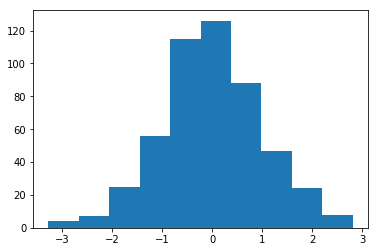

In [53]:
plt.hist(z_group['Age'])

**Este tipo de operación será super útil para el tratamiento de `NA`s.**

Podemos, p.ej, aplicar `transform` mediante una `lambda` que sustituya `NA`s por la media del resto de valores de la variable.

Aunque en nuestro dummy data set no tenemos valores faltantes, podría aplicarse este método de la siguiente manera.

In [56]:
fill_na_mean = lambda x: x.fillna(x.mean())
double_group.transform(fill_na_mean).head()

,Height,Weight,Age,Income
0,157.537932,61.405516,33,18059
1,160.533711,63.612665,36,18022
2,158.122405,66.587184,29,18898
3,165.892802,36.906338,33,20672
4,160.961691,73.011935,30,18356


## Otras operaciones útiles para datos agrupados

Le puedo pasar a la función `head()` como parámetro el número del objeto de cada uno de los grupos que quieres obtener.

Con `head(1)` obtendremos todos los objetos de la primera fila de cada grupo.

In [60]:
double_group.head(1)

,Gender,Economic Status,Height,Weight,Age,Income
0,Male,Low,157.537932,61.405516,33,18059
1,Female,High,160.533711,63.612665,36,18022
2,Female,Low,158.122405,66.587184,29,18898
3,Male,Middle,165.892802,36.906338,33,20672
4,Female,Middle,160.961691,73.011935,30,18356
9,Male,High,160.326193,61.480505,24,19066


Lo mismo ocurriría con la función `tail()`, solo que obtendríamos los últimos objetos de cada grupo.

In [61]:
double_group.tail(1)

,Gender,Economic Status,Height,Weight,Age,Income
483,Male,High,151.813296,62.900656,44,19883
494,Female,Middle,156.179046,77.051783,46,21307
495,Female,Low,156.909755,59.436029,25,20329
496,Male,Low,169.771594,89.107641,33,19896
497,Male,Middle,161.155045,100.478784,46,21248
499,Female,High,153.074215,49.686583,31,20885


O si queremos el objeto **enésimo** usaríamos la función `nth()`.

In [64]:
double_group.nth(27)

Height      Weight  Age  Income
Gender Economic Status                                     
Female High             156.305002   77.138310   14   18840
       Low              157.108214   43.716891   14   18452
       Middle           162.248219  103.687385   31   20229
Male   High             145.455846   28.842960   31   20332
       Low              168.699833   55.426853   32   18522
       Middle           166.990996   32.064415   41   18699

En este caso tenemos que tener cuidado de que no haya datos para la posición que estamos pidiéndole a los datos.

In [65]:
double_group.nth(89)

,,Height,Weight,Age,Income
Gender,Economic Status,,,,
Male,Middle,163.352322,72.115734,40,19207


Otra operación interesante es ordenar el `dataframe` por las columnas que resulten más interesantes antes de crear el objeto agrupado del `dataframe` original.

Supongamos que queremos ordenar los valores por edad (los más jóvenes) y por ingresos (los que menos ingresan). 

In [70]:
data_sorted = data.sort_values(["Age", "Income"])
data_sorted.head(10)

,Gender,Economic Status,Height,Weight,Age,Income
452,Male,High,159.564502,53.064365,-13,20683
105,Male,High,162.259344,70.854451,-6,20409
419,Male,Middle,151.840058,86.460584,-1,18267
255,Female,High,162.070793,81.392487,-1,19975
166,Male,Low,163.808273,30.855430,0,20579
314,Female,High,158.666313,49.514717,1,18223
196,Female,Low,158.686877,62.168267,1,19377
182,Male,Middle,153.181718,112.169881,2,21242
89,Female,Low,150.573340,78.804342,3,20677
455,Female,Middle,156.823353,84.603471,5,20833


Si quisíeramos acceder a los más jóvenes agrupando datos por género una vez los datos están ordenados como habíamos hecho, lo haríamos de la siguiente forma:

In [69]:
age_grouped = data_sorted.groupby("Gender")
age_grouped.head()

,Gender,Economic Status,Height,Weight,Age,Income
452,Male,High,159.564502,53.064365,-13,20683
105,Male,High,162.259344,70.854451,-6,20409
419,Male,Middle,151.840058,86.460584,-1,18267
255,Female,High,162.070793,81.392487,-1,19975
166,Male,Low,163.808273,30.855430,0,20579
314,Female,High,158.666313,49.514717,1,18223
196,Female,Low,158.686877,62.168267,1,19377
182,Male,Middle,153.181718,112.169881,2,21242
89,Female,Low,150.573340,78.804342,3,20677
455,Female,Middle,156.823353,84.603471,5,20833


Vemos como los jóvenes y con menos ingresos están en la parte de arriba de la tabla.

Si quisiera encontrar al hombre y mujer mayores de los datos agrupados:

In [71]:
age_grouped.tail(1)

,Gender,Economic Status,Height,Weight,Age,Income
118,Male,High,165.415646,56.780571,60,19984
435,Female,Low,159.194893,60.336743,63,20630


# Conjunto de entrenamiento y conjunto de testing

En Data Science, los datasets se dividen en dos o tres conjuntos habitualmente:
* Conjunto de entrenamiento (training set)
* Conjunto de prueba (test set)
* Conjunto de validación

In [77]:
os.getcwd()

'/Users/carlosdavila/Developer/Anaconda-projects/Curso-ml-python/jupiter-notebooks'

In [104]:
coursepath = "/Users/carlosdavila/Developer/GitHub/python-ml-course/datasets"
filename = "customer-churn-model/Customer Churn Model.txt"
fullpath = os.path.join(coursepath , filename)

In [105]:
data = pd.read_csv(fullpath)

In [106]:
len(data)

3333

### Dividir utilizando la distribución normal

Primero creo un vector de la longitud del dataset con una distribución normal.

In [108]:
a = np.random.randn(len(data))
a

array([ 0.23253451, -0.76953284, -0.63975004, ..., -0.84327539,
       -0.16707934, -0.31764616])

Si establecemos como condición para definir nuestro data set en training y test set tomando el 80% de los valores para el primero, lo podemos hacer de la siguiente manera. Esta condición puede variar según las necesidades de los datos que estemos estudiando o el modelo que queramos probar.

In [125]:
check = (a < 0.8)
check = check

Se genera un vector de valores booleanos.

In [126]:
check

array([ True,  True,  True, ...,  True,  True,  True])

Si lo queremos representar en un histograma para comprobar que los valores se han dividido en 80% de valores en un lado y el 20 en el resto, tendremos que cambiar el formato del objeto a flotante de 32 bits. Si lo intento hacer como flotante de 64 (como hace el profesor en el curso) python me devuelve un error.

(array([ 711.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2622.]), array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32), <a list of 10 Patch objects>)

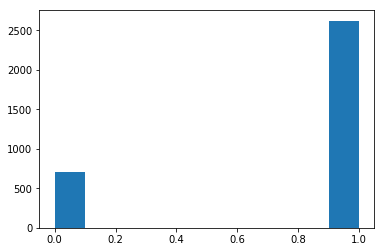

In [127]:
plt.hist(check.astype(np.float32))

Luego, configurando los data sets a partir del original, de la siguiente manera:
* Que cumpla la condición que hemos definido: `training = data[check]`
* Que no cumpla la condición: `testing = data[~check]`

In [128]:
training = data[check]
testing = data[~check]

Y vemos que tenemos el 80% de los valores en el training set y el 20% restante en el testing set.

In [129]:
len(training)

2622

In [130]:
len(testing)

711

### Con la librería sklearn

La librería `scikit-learn` es la principal librería para realizar "recetas de cocina" de aprendizaje estadístico. 

In [133]:
from sklearn.model_selection import train_test_split

Tiene numerosos métodos ya implementados para la división de los datasets.

Por ejemplo, para hacer una división del dataset determinando proporciones, como hicimos anteriormente, usaremos la función `train_test_split`, pasando en el argumento `test_size` el tamaño del conjunto `test` que deseamos.

In [134]:
training, test = train_test_split(data, test_size = 0.2)

In [136]:
len_train = len(training)
len_test = len(test)
print(len_train, len_test)

2622 667


Esta forma de hacer la división de conjuntos complica la reproductibilidad de los experimentos.

### Usando una función de shuffle

El profesor prueba la función `shuffle` de la libraría `numpy` pero le da un error. Para solucionarlo opta por la librería `sklearn` que en sublibría `utils` también tiene una función `shuffle`.

In [137]:
import sklearn
sklearn.utils.shuffle(data)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
3264,RI,89,415,414-1537,no,yes,24,97.8,98,16.63,...,67,17.61,214.5,126,9.65,5.9,2,1.59,0,False.
867,NV,86,510,353-7730,no,no,0,141.3,72,24.02,...,95,13.12,210.6,91,9.48,8.2,5,2.21,1,False.
1038,CA,112,415,338-6962,no,no,0,111.9,92,19.02,...,143,9.69,146.8,79,6.61,14.1,3,3.81,5,True.
1932,RI,17,415,396-9656,no,no,0,161.5,123,27.46,...,81,18.21,315.0,106,14.18,8.6,5,2.32,1,False.
1986,WI,70,415,405-9233,no,no,0,7.9,100,1.34,...,83,11.59,156.6,89,7.05,12.1,1,3.27,0,False.
720,CT,100,415,360-9676,no,yes,38,177.1,88,30.11,...,108,13.91,242.7,72,10.92,7.4,2,2.00,0,False.
26,WY,57,408,357-3817,no,yes,39,213.0,115,36.21,...,112,16.24,182.7,115,8.22,9.5,3,2.57,0,False.
772,ID,77,510,356-3403,no,no,0,189.5,112,32.22,...,95,17.60,214.1,91,9.63,9.2,7,2.48,0,False.
393,PA,112,510,352-9017,no,no,0,217.1,76,36.91,...,100,17.44,185.7,91,8.36,9.4,3,2.54,2,False.
21,CO,77,408,393-7984,no,no,0,62.4,89,10.61,...,121,14.44,209.6,64,9.43,5.7,6,1.54,5,True.


Para dividir los conjuntos una vez los datos se han mezclado aleatoriamente podemos, p. ej. seguir el procedimiento de tomar un porcentaje que divida los datos.

In [138]:
data = sklearn.utils.shuffle(data) # guardo los dato mezclados
cut_id = int(0.8*len(data)) # defino el porcentaje de corte y lo convierto en un entero para que funcione la división (no pode hacerse con decimales)
train_data = data[:cut_id] # los datos hasta el punto de corte
test_data = data[cut_id + 1:] # los datos a partir del punto de corte

In [139]:
len(train_data)

2666

In [142]:
len(test_data)

666